<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab3/Tema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Exercitiul 1: Monty Hall Problem**

Problema Monty Hall este un experiment de probabilitate care implică trei uși: în spatele uneia se află un premiu (o mașină), iar în spatele celorlalte două se află capre. Jucătorul alege inițial o ușă, iar gazda, care știe unde este premiul, deschide o altă ușă care are o capră. Jucătorul are apoi opțiunea de a schimba alegerea inițială cu cealaltă ușă rămasă.

Intuitiv, mulți cred că nu contează dacă schimbă, dar probabilitatea de câștig este mai mare (2/3) dacă jucătorul schimbă ușa, față de 1/3 dacă păstrează alegerea inițială.

Codul de Implementare
Acest cod folosește rețele Bayesiene (pgmpy) pentru a modela și rezolva problema Monty Hall.

Importarea Bibliotecilor:

Importăm bibliotecile necesare pentru a defini și lucra cu rețele Bayesiene (BayesianNetwork, TabularCPD, VariableElimination).


Definirea Structurii Rețelei:

Definim rețeaua Bayes folosind BayesianNetwork([('C', 'H'), ('P', 'H')]), unde:

C este ușa aleasă de jucător.

P este ușa cu premiul.

H este ușa deschisă de gazdă.

Relațiile (C, H) și (P, H) arată că H (ușa deschisă de gazda) depinde de C și P.

Definirea CPD-urilor:

cpd_c și cpd_p definesc distribuții uniforme pentru alegerea ușii de către jucător și locația premiului (1/3 pentru fiecare ușă).

cpd_h definește probabilitățile pentru gazda de a deschide o ușă, condiționat de alegerile jucătorului (C) și de locația premiului (P). Matricea valorilor din cpd_h reflectă faptul că gazda deschide întotdeauna o ușă care nu conține premiul și care nu a fost aleasă de jucător.


Asocierea CPD-urilor cu Modelul:

CPD-urile (cpd_c, cpd_p, cpd_h) sunt adăugate la model prin model.add_cpds(), iar modelul este verificat folosind model.check_model().

Calcularea Probabilităților prin Inferență:

Folosim VariableElimination pentru a calcula probabilitățile de câștig în cele două scenarii:

Dacă jucătorul schimbă alegerea inițială (C=0 și H=2):
 Calculăm probabilitatea ca premiul să fie în spatele unei alte uși decât cea aleasă inițial.

Dacă jucătorul păstrează alegerea inițială (C=0 și H=1): Calculăm probabilitatea de câștig dacă rămâne la prima alegere.

Rezultatele confirmă că schimbarea alegerii oferă o probabilitate mai mare de câștig (2/3) decât păstrarea alegerii inițiale (1/3).

In [ ]:

!pip install pgmpy

In [ ]:
'''P(C):
+----------+----------+-----------+-----------+
|    C     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.33  |    0.33   |    0.33   |
+----------+----------+-----------+-----------+

P(P):
+----------+----------+-----------+-----------+
|    P     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.33  |    0.33   |    0.33   |
+----------+----------+-----------+-----------+

P(H | P, C):
+------+------+------+------+------+------+------+------+------+------+
|   C  |          0         |          1         |          2         |
+------+------+------+------+------+------+------+------+------+------+
|   P  |   0  |   1  |   2  |   0  |   1  |   2  |   0  |   1  |   2  |
+------+------+------+------+------+------+------+------+------+------+
|  H=0 |   0  |   0  |   0  |   0  |  0.5 |   1  |   0  |   1  |  0.5 |
+------+------+------+------+------+------+------+------+------+------+
|  H=1 |  0.5 |   0  |   1  |   0  |   0  |   0  |   1  |   0  |  0.5 |
+------+------+------+------+------+------+------+------+------+------+
|  H=2 |  0.5 |   1  |   0  |   1  |  0.5 |   0  |   0  |   0  |   0  |
+------+------+------+------+------+------+------+------+------+------+
Tabelul P(H | P, C) are următoarea logică:

Gazda(H) nu va deschide niciodată ușa aleasă de concurent (C).
Astfel, în cazul în care premiul se află în spatele acelei uși, H va alege o altă ușă(din cele 2) cu o capră.
H trebuie să deschidă întotdeauna o ușă care nu conține premiul.
 Aceasta înseamnă că, în funcție de poziția premiului (P) și alegerea concurentului (C), H deschide cu probabilitate de 1 o ușă care să respecte aceste reguli.'''

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianNetwork([("C", "H"), ("P", "H")])

# Defining the CPDs: distribuțiile condiționate de probabilitate
cpd_c = TabularCPD("C", 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD("P", 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD(
    "H",
    3,
    [    #C=0         C=1             C=3
        [0,   0, 0,   0,  0.5, 1,   0, 1, 0.5], # H=0
        [0.5, 0, 1,   0,  0,   0,   1, 0, 0.5], # H=1
        [0.5, 1, 0,   1,  0.5, 0,   0, 0, 0], # H=2
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

#CPD-urile (cpd_c, cpd_p, cpd_h) sunt adăugate la model prin model.add_cpds(), iar modelul este verificat folosind model.check_model().
model.add_cpds(cpd_c, cpd_p, cpd_h)

model.get_cpds()
# check_model check for the model structure and the associated CPD and returns True if everything is correct otherwise throws an exception
model.check_model()

#Calcularea Probabilităților conditionate prin Inferență:
from pgmpy.inference import VariableElimination # Folosim VariableElimination pentru a calcula probabilitățile pentru diferite scenarii:

infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
#Calculăm probabilitatea ca premiul (P) să fie în spatele unei anumite uși, având în vedere că jucătorul a ales inițial ușa 0 (C=0) și H a deschis ușa 2 (H=2).
print(posterior_p)


#Rezultatul arată că probabilitatea de a câștiga dacă schimbăm alegerea inițială este mai mare decât dacă nu schimbăm.

' the probability of the prize i.e.  P(P|H=2, C=0)'

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


' the probability of the prize i.e.  P(P|H=2, C=0)'

**Exercitiul 2:**


In [54]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

model = BayesianNetwork([
    ('B', 'T'),  # Boala cauzează tuse
    ('B', 'X'),  # Boala cauzează radiografie anormală
    ('B', 'D'),  # Boala influențează dificultatea de respirație
    ('T', 'D')   # Tusea influențează dificultatea de respirație
])

#caz 1:
cpd_b = TabularCPD("B", 2, [[0.9], [0.1]])


#caz 2:
cpd_t = TabularCPD(
    "T", 2,

    [    #B=0      B=1
        [0.7,      0.2], # T=0
        [0.3,      0.8]  # T=1
    ],
    evidence=["B"],
    evidence_card=[2]
)


#caz 3:
cpd_x = TabularCPD(
    "X", 2,
    [    # B=0      B=1
        [0.9,       0.1], # X=0
        [0.1,       0.9]  # X=1
    ],
    evidence=["B"],
    evidence_card=[2]
)


#caz 4
cpd_d = TabularCPD(
    "D", 2,
    [   # B=0           B=1
        [0.9,   0.5,  0.6,  0.1], # D=0
        [0.1,   0.5,  0.4,  0.9]  # D=1
    ],
    evidence=["B", "T"],
    evidence_card=[2, 2]
)

# Associating the CPDs with the model
model.add_cpds(cpd_b, cpd_t, cpd_x, cpd_d)

# Check model consistency
model.check_model()



True

2.

In [31]:
from pgmpy.inference import VariableElimination

# Inițializăm obiectul de inferență
infer = VariableElimination(model)

# Calculăm probabilitatea condiționată
posterior_p = infer.query(['B'], evidence={'T': 1, 'D': 1})

print(f"{posterior_p} \n")
'P(B=1 | T=1, D=1)'

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.6522 |
+------+----------+
| B(1) |   0.3478 |
+------+----------+ 



'P(B=1 | T=1, D=1)'

3.

In [30]:

prob_X_given_B0 = infer.query(variables=['X'], evidence={'B': 0})
print(prob_X_given_B0)
'P(X=1∣B=0)=0.1'

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9000 |
+------+----------+
| X(1) |   0.1000 |
+------+----------+


'P(X=1∣B=0)=0.1'

4. 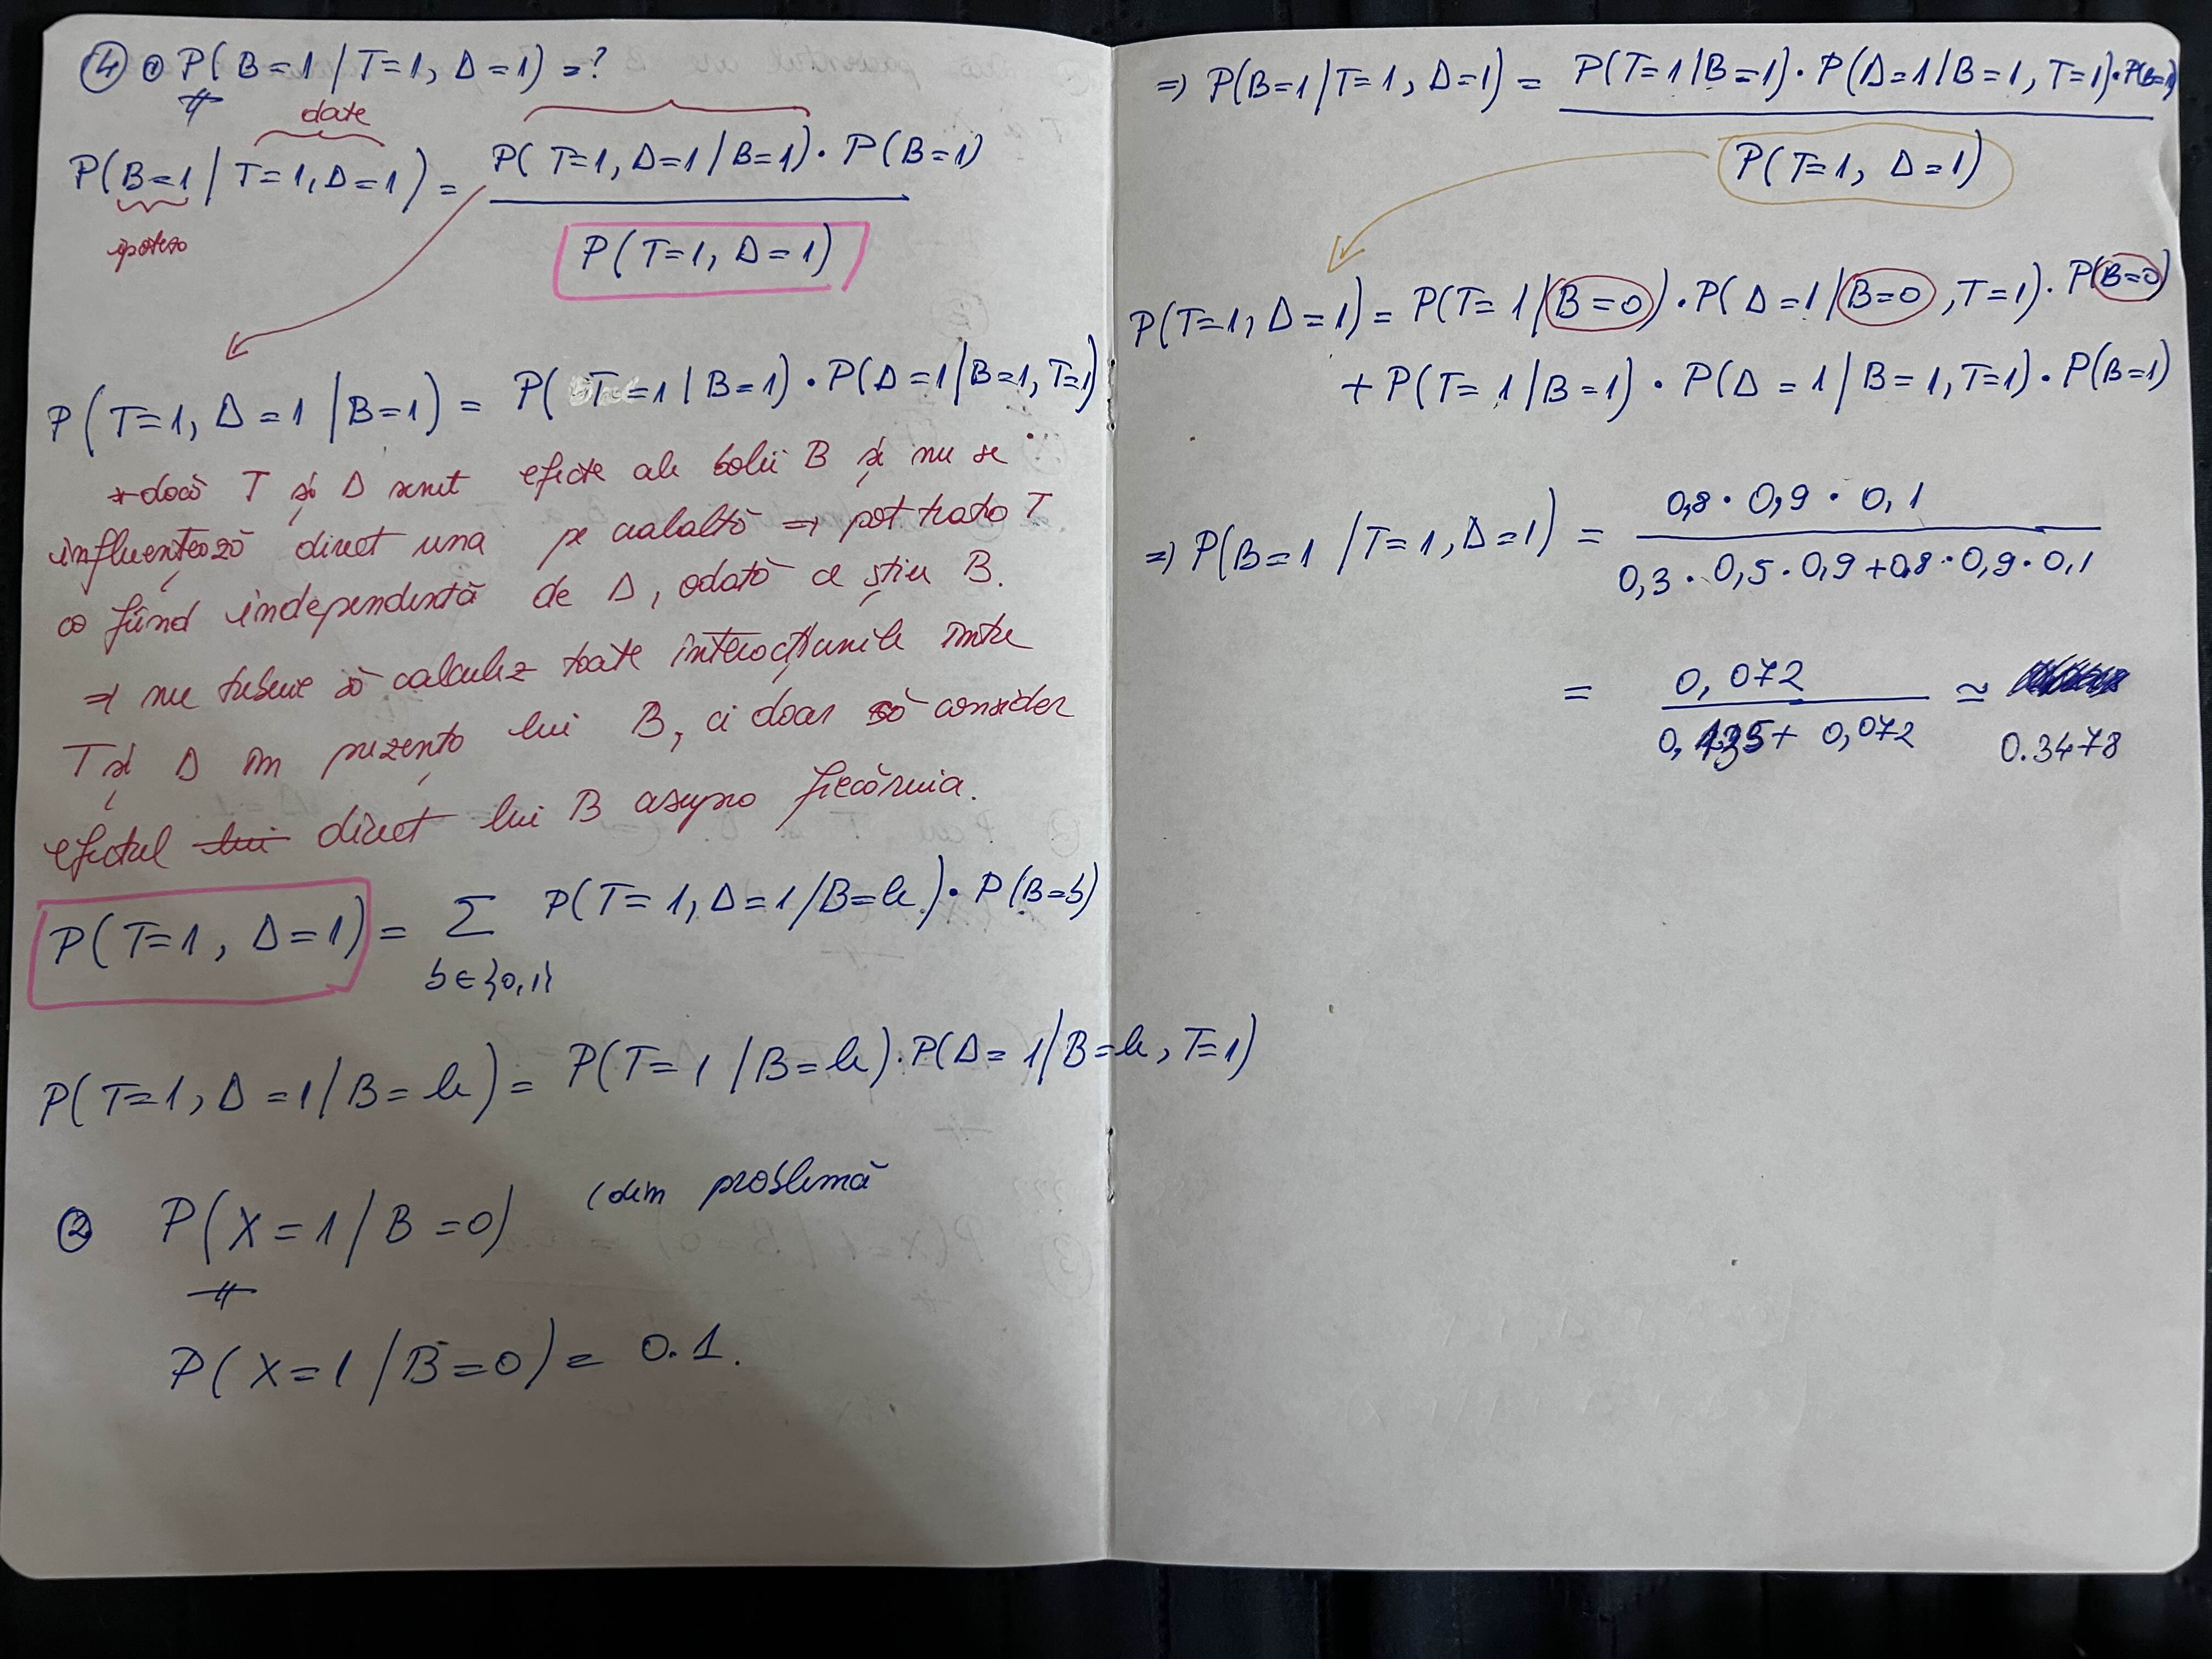 Bonus: Calculaţi cele 2 probabilităţi folosind regula lui Bayes şi incărcaţi calculul fie în Markdown/Latex, fie ca foto
la foia de lucru (indicaţie: puteţi să vă folosiţi de independenţele condiţionale rezultate din modelul de reţea bayesiană)

Exercitiul 3.

3.1

In [59]:
import random

def arunca_zar():
    return random.randint(1, 6)

# Funcțiile pentru aruncarea monedei
def arunca_moneda_normala():
    return random.choice([0, 1])  # 0 - față, 1 - stema (probabilitate 0.5)

def arunca_moneda_masluita():
    return 1 if random.random() < 4/7 else 0  # 1 - stema cu probabilitate 4/7

def arunca_moneda(numar_aruncari, este_masluita):
    if este_masluita:
        return sum(arunca_moneda_masluita() for _ in range(numar_aruncari))
    else:
        return sum(arunca_moneda_normala() for _ in range(numar_aruncari))

def simuleaza_joc():
    # Aruncăm moneda pentru a decide cine începe (J0 sau J1)
    primul_jucator = random.choice([0, 1])  # 0 - J0, 1 - J1

    # Primul jucător aruncă cu zarul
    n = arunca_zar()

    # Celălalt jucător aruncă moneda de 2n ori
    if primul_jucator == 0:  # J0 a început
        # J1 aruncă moneda măsluită de 2n ori
        m = arunca_moneda(2 * n, este_masluita=True)
    else:  # J1 a început
        # J0 aruncă moneda normală de 2n ori
        m = arunca_moneda(2 * n, este_masluita=False)

    # Determinăm câștigătorul
    if n >= m:
        return primul_jucator  # Câștigă jucătorul care a început
    else:
        return 1 - primul_jucator  # Câștigă celălalt jucător

# Simulăm 10.000 de jocuri
numar_simulari = 10000
castiguri_j0 = 0
castiguri_j1 = 0

for _ in range(numar_simulari):
    castigator = simuleaza_joc()
    if castigator == 0:
        castiguri_j0 += 1
    else:
        castiguri_j1 += 1

print(f"J0 a câștigat în {castiguri_j0} din {numar_simulari} jocuri ({castiguri_j0 / numar_simulari * 100:.2f}%)")
print(f"J1 a câștigat în {castiguri_j1} din {numar_simulari} jocuri ({castiguri_j1 / numar_simulari * 100:.2f}%)")
if castiguri_j0 > castiguri_j1:
    print("J0 are șansele cele mai mari de câștig.")
else:
    print("J1 are șansele cele mai mari de câștig.")


J0 a câștigat în 4283 din 10000 jocuri (42.83%)
J1 a câștigat în 5717 din 10000 jocuri (57.17%)
J1 are șansele cele mai mari de câștig.


3.2

In [52]:
import math
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

def construieste_modelul_jocului():
    # CoinFlip = prima aruncare a monedei (monedă normală)
    # PlayerStart = jucătorul care începe (0 sau 1)
    # DiceRoll = valoarea obținută prin aruncarea zarului
    # NumHeads = numărul de steme obținute

    joc_model = BayesianNetwork([
        ('CoinFlip', 'PlayerStart'),
        ('PlayerStart', 'DiceRoll'),
        ('DiceRoll', 'NumHeads'),
        ('PlayerStart', 'NumHeads')
    ])

    # CPD pentru CoinFlip (aruncarea inițială a monedei)
    cpd_coin_flip = TabularCPD(variable='CoinFlip', variable_card=2, values=[[0.5], [0.5]])

    # CPD pentru PlayerStart (cine începe în funcție de CoinFlip)
    cpd_player_start = TabularCPD(
        variable='PlayerStart', variable_card=2,
        values=[[1, 0],
                [0, 1]],
        evidence=['CoinFlip'], evidence_card=[2]
    )

    # CPD pentru DiceRoll (rezultatul aruncării zarului, probabilități uniforme pentru un zar corect)
    cpd_dice_roll = TabularCPD(
        variable='DiceRoll', variable_card=6,
        values=[
            [1 / 6, 1 / 6],  # Probabilitatea de a obține 1, 2, 3, ... , 6 pentru Jucătorul 0
            [1 / 6, 1 / 6],  # Probabilitatea de a obține 1, 2, 3, ... , 6 pentru Jucătorul 1
            [1 / 6, 1 / 6],
            [1 / 6, 1 / 6],
            [1 / 6, 1 / 6],
            [1 / 6, 1 / 6]
        ],
        evidence=['PlayerStart'], evidence_card=[2]
    )

    # CPD pentru NumHeads (numărul de steme obținute)
    # `NumHeads` depinde de `DiceRoll` și `PlayerStart`, deci trebuie să calculăm distribuția pentru fiecare caz
    prob_stema_j0 = 0.5  # Monedă corectă pentru Jucătorul 0
    prob_stema_j1 = 4 / 7  # Monedă măsluită pentru Jucătorul 1
    max_steme = 12  # Numărul maxim de steme pentru `NumHeads`

    # Construirea valorilor de probabilitate pe baza monedei măsluite/corecte
    valori = []
    # Iterăm peste fiecare rezultat posibil al zarului, DiceRoll (de la 1 la 6)
    for n in range(1, 7):
        # Calculăm probabilitățile pentru Jucătorul 0 (care folosește o monedă corectă)
        prob_heads_j0 = []
        for k in range(2 * n + 1):  # Posibilele rezultate ale stemei pentru Jucătorul 0, de la 0 la 2*N
            prob_k_heads = math.comb(2 * n, k) * (prob_stema_j0 ** k) * ((1 - prob_stema_j0) ** (2 * n - k))
            prob_heads_j0.append(prob_k_heads)

        # Calculăm probabilitățile pentru Jucătorul 1 (care folosește o monedă măsluită)
        prob_heads_j1 = []
        for k in range(2 * n + 1):  # Posibilele rezultate ale stemei pentru Jucătorul 1, de la 0 la 2*N
            prob_k_heads = math.comb(2 * n, k) * (prob_stema_j1 ** k) * ((1 - prob_stema_j1) ** (2 * n - k))
            prob_heads_j1.append(prob_k_heads)

        # Completăm cu zero pentru a acoperi rezultate până la 12 steme
        # Este necesar deoarece `2 * N` poate varia, dar avem nevoie de dimensiune uniformă
        prob_heads_j0 += [0] * (max_steme - len(prob_heads_j0) + 1)
        prob_heads_j1 += [0] * (max_steme - len(prob_heads_j1) + 1)

        # Adăugăm aceste distribuții în lista de valori
        valori.append(prob_heads_j0)  # Adăugăm probabilitățile pentru Jucătorul 0
        valori.append(prob_heads_j1)

    # Reshape lista pentru a se potrivi cu forma așteptată (variable_card, evidence_card[0] * evidence_card[1])
    valori = np.array(valori).T.tolist()

    cpd_num_heads = TabularCPD(
        variable='NumHeads', variable_card=max_steme + 1,
        values=valori,
        evidence=['PlayerStart', 'DiceRoll'],
        evidence_card=[2, 6])

    # Adăugarea CPD-urilor la model
    joc_model.add_cpds(cpd_coin_flip, cpd_player_start, cpd_dice_roll, cpd_num_heads)

    # Verificarea validității modelului
    try:
        joc_model.check_model()
        print("Modelul a fost construit cu succes.")
    except Exception as e:
        print(f"A apărut o eroare: {e}")

    return joc_model
# Apelarea funcției pentru a construi modelul
construieste_modelul_jocului()

Modelul a fost construit cu succes.


3.3

In [53]:
# Apelarea funcției pentru a construi modelul
model = construieste_modelul_jocului()

# Inferența pentru a determina cine a început jocul, știind că s-a obținut o singură stemă
inference = VariableElimination(model)
rezultate = inference.query(variables=['PlayerStart'], evidence={'NumHeads': 1})
print(rezultate)

Modelul a fost construit cu succes.
+----------------+--------------------+
| PlayerStart    |   phi(PlayerStart) |
+================+====================+
| PlayerStart(0) |             0.9633 |
+----------------+--------------------+
| PlayerStart(1) |             0.0367 |
+----------------+--------------------+
